<a href="https://colab.research.google.com/github/Md-Refat-Hosain/Practice-DataScience-Projects/blob/main/Kaggle_bike_deman_project_(09_12_24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import statistics as st


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [ ]:
# STEP - 1  Reading the data

In [ ]:
bikes = pd.read_csv('/content/drive/MyDrive/Kaggle bike demand project Dataset/hour.csv' )

In [ ]:
bikes.sample(5)

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
11986,11987,19-05-2012,2,1,5,15,0,6,0,1,0.72,0.6515,0.30,0.1045,356,316,672
8478,8479,24-12-2011,1,0,12,22,0,6,0,1,0.24,0.2879,0.52,0.0000,8,12,20
10017,10018,27-02-2012,1,1,2,10,0,1,1,1,0.32,0.3030,0.45,0.2537,16,88,104
9695,9696,13-02-2012,1,1,2,22,0,1,1,1,0.26,0.2727,0.56,0.1045,3,99,102
9630,9631,11-02-2012,1,1,2,5,0,6,0,3,0.22,0.2273,0.93,0.1642,0,2,2


In [ ]:
# STEP - 1 : Prelim analysis and feature selection

In [ ]:
bikes_prep = bikes.copy()

In [ ]:
bikes_prep = bikes_prep.drop(['casual','registered'] , axis = 1)

In [ ]:
bikes_prep

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [ ]:
bikes_prep =  bikes_prep.drop(['index' , 'date' ] , axis = 1)

In [ ]:
bikes_prep

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [ ]:
# Basic checks of missing values

In [ ]:
bikes_prep.isnull().sum()

,0
season,0
year,0
month,0
hour,0
holiday,0
weekday,0
workingday,0
weather,0
temp,0
atemp,0


In [ ]:
# Visualizing the data

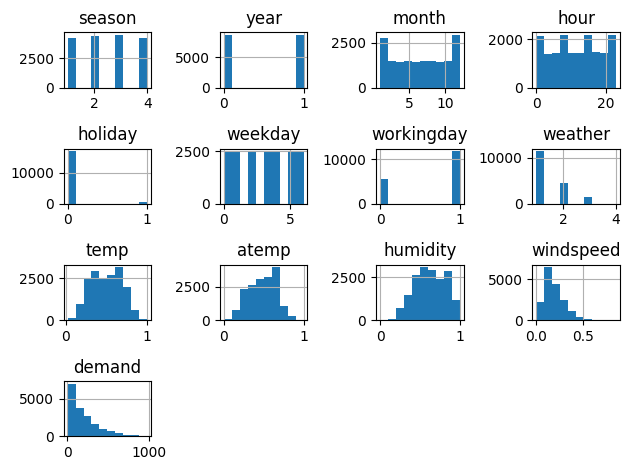

In [ ]:
bikes_prep.hist(rwidth = 1.9);
plt.tight_layout()

In [ ]:
# Visualize the continueous features vs demand

In [ ]:
bikes_prep.head(2)

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40


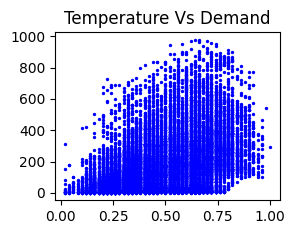

In [ ]:
plt.subplot(2,2,1)
plt.title('Temperature Vs Demand')
plt.scatter(bikes_prep['temp'] , bikes_prep['demand'] , s=2 ,c='b')

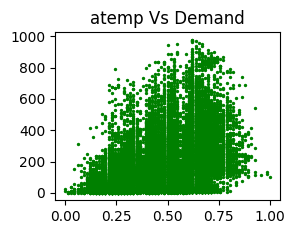

In [ ]:
plt.subplot(2,2,1)
plt.title('atemp Vs Demand')
plt.scatter(bikes_prep['atemp'] , bikes_prep['demand'] , s=2 , c = 'g')

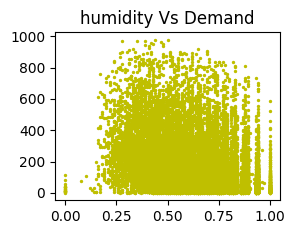

In [ ]:
plt.subplot(2,2,1)
plt.title('humidity Vs Demand')
plt.scatter(bikes_prep['humidity'] , bikes_prep['demand'] , s=2 , c='y')

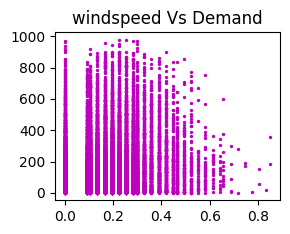

In [ ]:
plt.subplot(2,2,1)
plt.title('windspeed Vs Demand')
plt.scatter(bikes_prep['windspeed'] , bikes_prep['demand'] , s=2 , c='m')

In [ ]:
# Plot the categorical features vs demand

In [ ]:
# Create a list of unique values of seasons

In [ ]:
bikes_prep.head(3)

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32


In [ ]:
cat_list = bikes_prep['season'].unique()

In [ ]:
# Create average demand paer season using group by

In [ ]:
cat_avrg  = bikes_prep.groupby('season').mean()['demand']

In [ ]:
cat_avrg

,demand
season,
1,111.114569
2,208.344069
3,236.016237
4,198.868856


<BarContainer object of 4 artists>

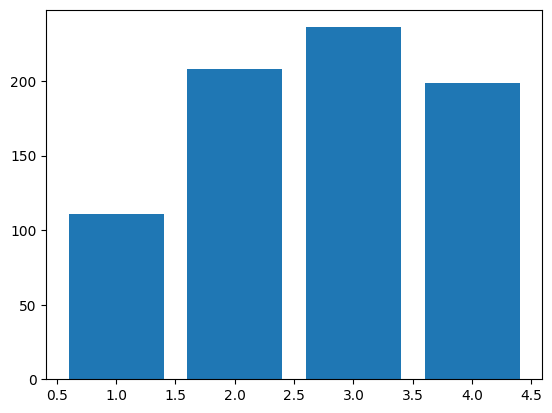

In [ ]:
plt.bar(cat_list , cat_avrg)

In [ ]:
# Check for Outliers

In [ ]:
bikes_prep['demand'].describe()

,demand
count,17379.000000
mean,189.463088
std,181.387599
min,1.000000
25%,40.000000
50%,142.000000
75%,281.000000
max,977.000000


In [ ]:
bikes_prep['demand'].quantile([.05, .1 , .15, .9 , .95 , .99])

,demand
0.05,5.00
0.10,9.00
0.15,16.00
0.90,451.20
0.95,563.10
0.99,782.22


In [ ]:
# Linearity check of co-relation matrix

In [ ]:
bikes_prep.head(2)

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40


In [ ]:
correlation = bikes_prep[['temp' , 'atemp' , 'humidity' , 'windspeed' , 'demand']].corr()

In [ ]:
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [ ]:
bikes_prep = bikes_prep.drop(['weekday' , 'year' , 'workingday' , 'atemp' , 'windspeed'] , axis = 1)

In [ ]:
bikes_prep

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1
...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,119
17375,1,12,20,0,2,0.26,0.60,89
17376,1,12,21,0,1,0.26,0.60,90
17377,1,12,22,0,1,0.26,0.56,61


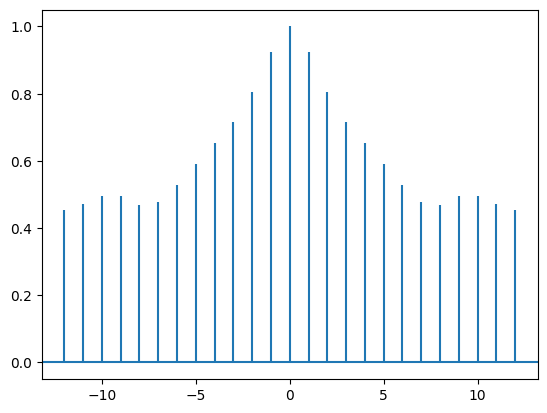

In [ ]:
df1 = pd.to_numeric(bikes_prep['demand'] , downcast='float')
plt.acorr( df1 , maxlags = 12);

In [ ]:
# Log-normalize the 'demand' feature.

<Axes: >

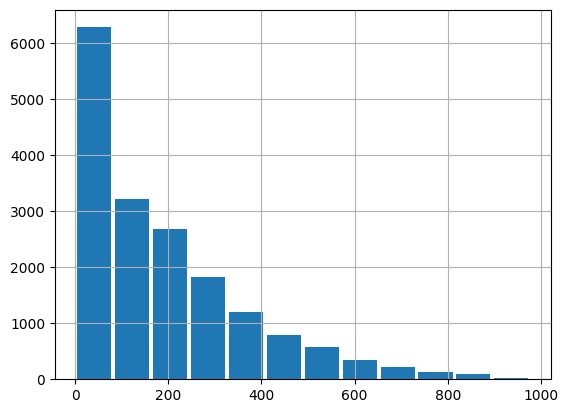

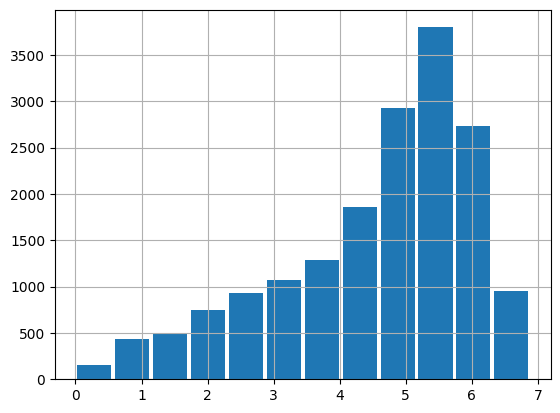

In [ ]:
df1 = bikes_prep['demand']
df2 = np.log(df1)

plt.figure()
df1.hist(rwidth=.9 , bins = 12)


plt.figure()
df2.hist(rwidth=.9 , bins = 12)

In [ ]:
bikes_prep['demand'] = np.log(bikes_prep['demand'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
